

# Introducción


## Series de tiempo

-   Una *serie de tiempo* es una sucesión de datos $X=\{x_{t}\}$,
    donde la variable $t$ toma valores uniformemente espaciados en
    el tiempo. El valor $x_{t}$ se interpreta como el valor que toma una
    cantidad a estudiar en el tiempo $t$.
-   En este trabajo para simplificar la discusión, supondremos sin
    perder generalidad que la variable $t$ toma valores en los
    enteros no negativos: $0,1,2,3,\ldots$.


## Python

-   *Python* es un lenguaje de programación moderno, el cual puede
    obtenerse legalmente de internet de manera gratuita. El lenguaje
    *Python* se presta de manera natural a las aplicaciones a la
    ciencia.

-   En este trabajo mostraremos el uso de sus librerías `matplotlib`
    (la cual sirve para producir dibujos científicos) y `networkx`
    (la cual ayuda a manipular y dibujar redes complejas).


## `matplotlib`

Como primer ejemplo, mostramos el código para producir una
representación gráfica de la serie de tiempo `[2,3,10,2,4,5]`,
usando `matplotlib`.



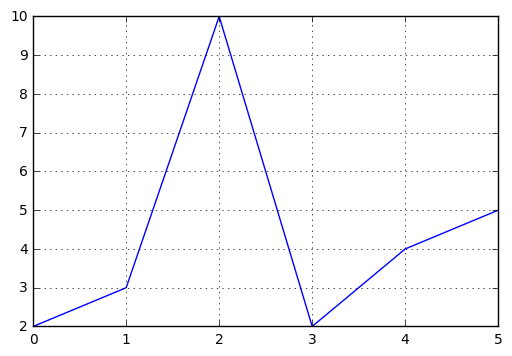

In [1]:
import matplotlib.pyplot as plt
y=[2,3,10,2,4,5]
plt.grid(True)
plt.plot(y)
plt.show()


## Gráfica de visibilidad

En la última parte de esta presentación, utilizaremos el concepto
de gráfica de visibilidad para proporcionarnos un ejemplo no
trivial del uso de *Python*.


# El lenguaje Python


## Instalación

-   El lenguaje *Python* puede descargarse de su sitio
    oficial: [https://www.python.org](https://www.python.org), para diversos sistemas operativos,
    incluyendo Windows™ y MacOS™.
-   También puede obtenerse la distribución Anaconda™, la cual está
    ya adaptada para el trabajo científico, de la página
    [https://www.continuum.io/](https://www.continuum.io/).
-   En Ubuntu y otras varias distribuciones de Linux, *Python* viene
    preinstalado.


## Librerías

-   *Python* tiene las estructuras de datos básicas, como las listas y
    los enteros. Por ejemplo, en el código anterior se asigna a la
    variable `y` la lista de enteros `[2,3,10,2,4,5]`, que en este
    caso la estamos interpretando como una serie de tiempo.



-   En *Python* existen muchísimas librerías que extienden la
    capacidad del lenguaje. Como ejemplo, mencionamos la librería
    `matplotlib` ([https://matplotlib.org](https://matplotlib.org)).


# Python no es difícil

-   En el dibujo anterior hemos demostrado que, aunque *Python* es
    un lenguaje muy complejo, no es necesario usar toda su complejidad
    para empezar a usarlo.
-   Vamos a dar un ejemplo ligeramente más complicado, el cual nos
    será útil en adelante. Para el propósito de definir la gráfica de
    visibilidad, será conveniente usar barras para indicar los valores
    de la serie de tiempo.


# Histograma



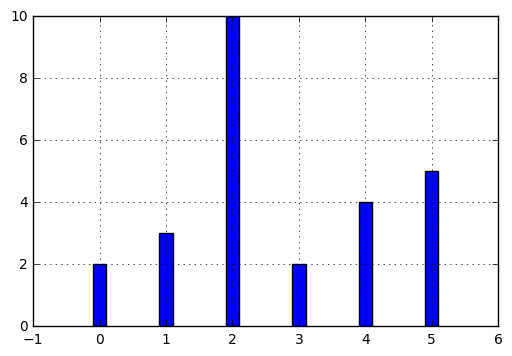

In [12]:
import matplotlib.pyplot as plt
y=[2,3,10,2,4,5]
plt.grid(True)
plt.bar(range(len(y)),
        y,
        width=0.2,
        align='center')
plt.show()


# Gráficas


## El concepto matemático de gráfica

-   Una **gráfica** $G$ se compone de
    -   un conjunto, denotado con $V(G)$, a cuyos elementos se les
        llama **vértices**, y de
    -   un conjunto de parejas no ordenadas de vértices, denotado con
        $E(G)$, a cuyos elementos se les llama **aristas**.
-   En las aplicaciones, se le suele llamar a las gráficas **grafos** y
    también **redes** o **redes complejas**. A los vértices se les llega a
    llamar **nodos**.
-   Si los vértices $v_{1}$, $v_{2}$ son tales que
    $\{v_{1},v_{2}\}\in E(G)$, decimos que $v_{1}$ y $v_{2}$ son
    **adyacentes**.


## Grado de un vértice

-   Si $v$ es un vértice de la gráfica $G$, a la cantidad de aristas
    que contienen a $v$ se le llama el **grado** de $v$. La cantidad
    $\Delta(G)=\max\{\mathrm{grado}(v)\mid v\in V(G)\}$ es el **grado
    máximo** de la gráfica.
-   La sucesión
    $(d_{0},d_{1},\ldots,d_{\Delta(G)})$, donde $d_{i}$ es la
    cantidad de vértices de $G$ de grado $i$, es el **histograma de
    grados** de $G$.
-   El histograma de grados ha sido empleado como un parámetro que
    permite detectar propiedades de la gráfica $G$. Existen muchas
    otros parámetros de las gráficas dignos de estudiarse, que se
    pueden consultar en un texto de teoría de gráficas.


## Ejemplo de gráfica

-   Como ejemplo, podemos definir una gráfica $P$, cuyo conjunto de
    vértices es $V(P)=\{a,b,c\}$, y cuyo conjunto de aristas es
    $E(P)=\{\{a,b\},\{b,c\}\}$.
-   Los vértices $a$ y $c$ tienen grado 1, mientras que el vértice
    $b$ tiene grado $2$.
-   De este modo, $\Delta(P)=2$ y el histograma de grados
    es $(0,2,1)$, pues hay cero vértices de grado 0, dos de grado 1
    y uno de grado 2.


## Gráficas en Python

En la figura se muestra un dibujo de la gráfica $P$, que definimos
en el párrafo anterior, hecho con *Python* y las librerías
`matplotlib` y `networkx`



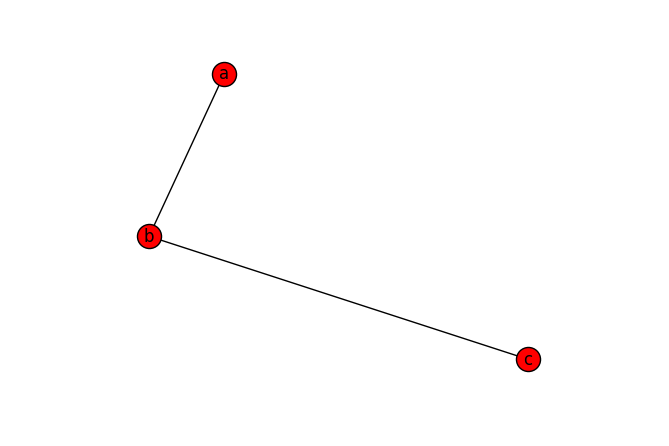

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
P=nx.Graph([('a','b'),('b','c')])
nx.draw(P,with_labels=True)
plt.show()


# Propiedades de gráficas

Una vez que la gráfica ha sido creada en Python, es posible obtener
propiedades de la gráfica. Por ejemplo:



In [4]:
P.nodes()

['a', 'c', 'b']

produce:

    ['a', 'c', 'b']

mientras que:



In [5]:
P.degree('b')

2


# Nuevas funciones en Python

En `networkx` no existe ya definida una función para calcular el
grado máximo de una gráfica. Sin embargo, no es difícil obtener tal
parámetro por medio de una nueva función, digamos `grado_max`, del
siguiente modo:



In [6]:
def grado_max(G):
    return max(G.degree(G.nodes()).values())

y entonces



In [7]:
grado_max(P)

2


# Aplicación a la gráfica de visibilidad


## Gráfica de visibilidad

-   Lacasa y otros introdujeron en 2008 la **gráfica de visibilidad
    asociada a una serie de tiempo** como una herramienta para
    analizar diversas propiedades de la serie.
-   Los autores observan, por ejemplo, que si la serie de tiempo es
    periódica, entonces la gráfica de visibilidad tiene cierta regularidad.
-   Por otro lado, también observan que la gráfica de visibilidad
    permanece invariante bajo ciertos cambios no esenciales de la
    serie de tiempo, como traslación o reescalamientos.


## Adyacencias en la gráfica de visibilidad

-   La gráfica de visibilidad tiene como vértices los datos de la
    serie de tiempo, por lo quepueden tomarse como
    $V=\{0,1,2,\ldots,n-1\}$.
-   Se declaran adyacentes entre sí aquellos datos tales que, las
    partes superiores de sus barras correspondientes sean "visibles"
    entre sí considerando a las barras como "paredes".

![img](./barras-adyacentes.png)

![img](./barras-no-adyacentes.png)


## 

Es inmediato entonces determinar la lista completa de las aristas
de la gráfica de visibilidad de la serie de tiempo
`[2,3,10,2,4,5]`, y usando `networkx`, realizar un dibujo de la
gráfica. 

![img](simple02.png)



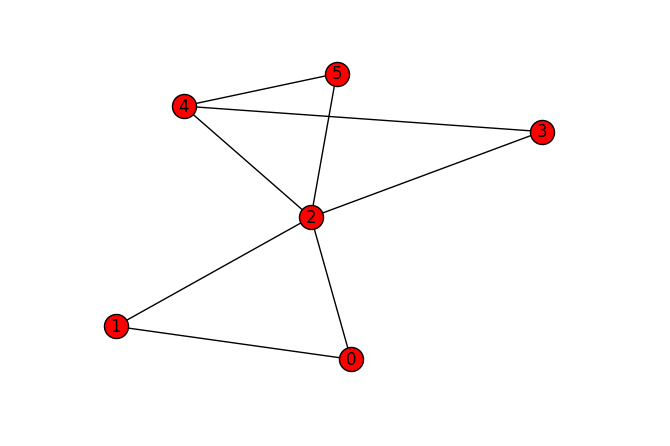

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph([(0,1),(0,2),(1,2),
            (2,3),(2,4),(2,5),
            (3,4),(4,5)])
nx.draw(G,with_labels=True)
plt.show()


# Definición formal de la gráfica de visibilidad

Los datos $(t_{a},y_{a})$, $(t_{b},y_{b})$ se declaran
adyacentes en la gráfica de visibilidad siempre y cuando se tenga
que para todos los $t_{c}$ con $t_{a}<t_{c}<t_{b}$ se cumple
que:

\begin{equation*}
y_{c}<y_{b}+(y_{a}-y_{b})\frac{t_{b}-t_{c}}{t_{b}-t_{a}}.
\end{equation*}


# Función de visibilidad

En *Python*, podemos definir una función que determine si, dada una
serie de tiempo y dos datos, tales datos son adyacentes en la
gráfica de visibilidad de la serie de tiempo. 

La función `is_visible` regresa `True` si los datos `a`, `b` son
adyacentes y `False` si no.



In [14]:
def is_visible(y,a,b):
    isit = True
    c = a+1
    while isit and c < b:
        isit = y[c]<y[b]+(y[a]-y[b])*((b-c)/float(b-a))
        c = c+1
    return isit


# Función de gráfica de visibilidad

Se usa la función `is_visible` anterior.



In [15]:
def visibility_graph(ts):
    eds = []
    for a in range(len(ts)):
        for b in range(a+1,len(ts)):
            if is_visible(ts,a,b):
                eds.append((a,b))
    return nx.Graph(eds)


## Varios tipos de gráficas de visibilidad

-   Recientemente se han definido, (y estudiado y aplicado) variantes
    de la gráfica de visibilidad, como:
    -   la gráfica de visibilidad horizontal,
    -   la gráfica de visibilidas con pesos,
    -   la gráfica de visibilidad paramétrica.

-   El código que hemos presentado podría adaptarse sin muchos
    problemas para considerar las otras definiciones de visibilidad.

-   En la siguiente sección aplicaremos este código a una serie de
    tiempo mucho más complicada.


# El mapeo logístico


## Serie de tiempo por iteraciones

-   Una manera sencilla de obtener una serie de tiempo en un conjunto de
    números reales $X$, es por medio de las iteraciones de una función
    $f\colon X\to X$.
-   Para construir una serie de tiempo de tal modo, se toma una
    condición inicial $x_{0}\in X$, y los datos subsiguientes se
    definen recursivamente para $t>0$ como $x_{t}=f(x_{t-1})$.
-   Uno de las casos más estudiados, es el **mapeo logístico**, en el cual
    se toma $X=[0,1]$, es decir, el intervalo de números reales entre
    $0$ y $1$, y la función $f(x)=\mu x(1-x)$, donde $\mu$
    satisface $0\leq \mu\leq 4$.
-   Se sabe que
    para ciertos valores de $\mu$ las iteraciones muestran el fenómeno
    de **caos**.


## Serie de tiempo del mapeo logístico

Se dibuja la serie de tiempo obtenida con condición inicial
$x_{0}=0.3$, valor del parámetro $\mu=3.8$, y con 50
iteraciones. En este caso, la serie de tiempo queda guardada en una
lista llamada `vals`.



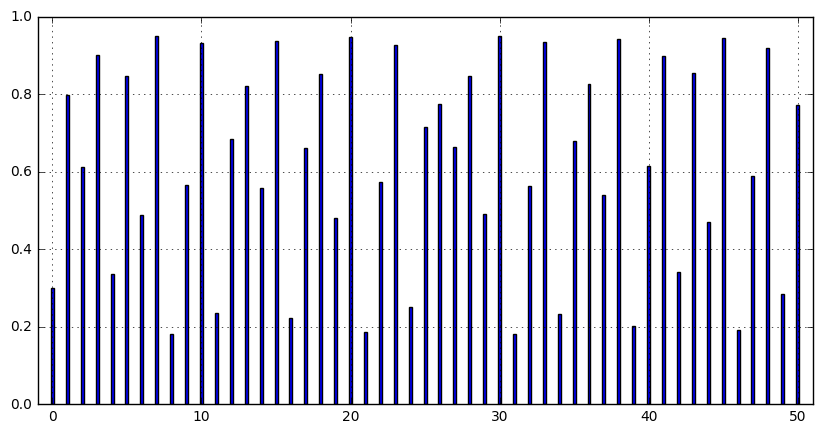

In [16]:
import matplotlib.pyplot as plt
def f(x):
    return 3.8*x*(1-x)
vals=[0.3]
iteraciones=50
for i in range(iteraciones):
    new = vals[-1]
    vals.append(f(new))
plt.figure(figsize=(10,5))
plt.axis([-1,iteraciones+1,0,1])
plt.grid(True)
plt.bar(range(len(vals)),
        vals,
        width=0.2,
        align='center')
plt.show()


# Gráfica de la serie de tiempo logística

Se puede ahora utilizar la lista `vals` para obtener la gráfica de
visibilidad de la serie de tiempo que se originó con las
iteraciones del mapeo logístico.



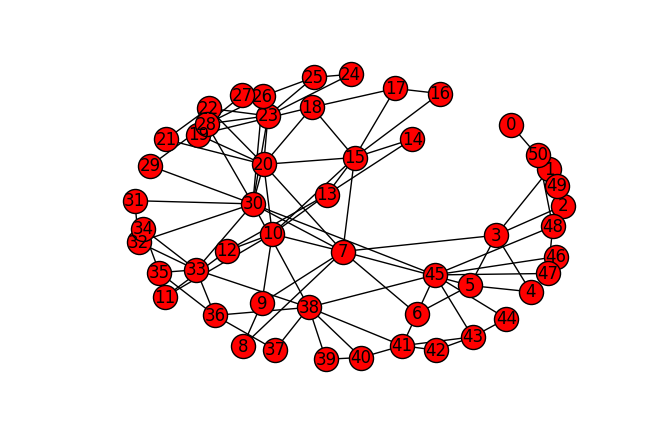

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

G=visibility_graph(vals)
nx.draw(G,
        with_labels=True)
plt.show()


# Histograma de grados



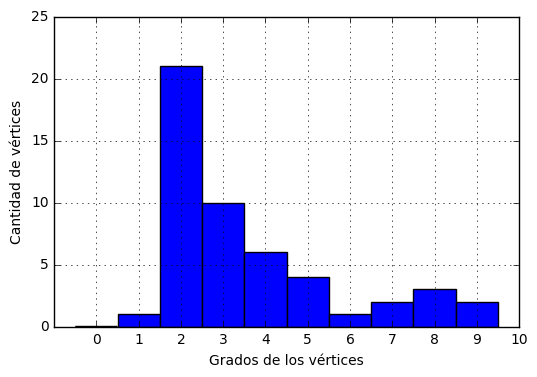

In [18]:
import numpy as np 
degs = list(G.degree().values())
dmax=max(degs)
bins = np.arange(dmax) - 0.5
plt.xlim(xmin=-1)
plt.hist(degs,bins)
plt.xticks(range(dmax))
plt.xlabel(
    u"Grados de los vértices")
plt.ylabel(
    u"Cantidad de vértices")
plt.grid(True)
plt.show()


# Conclusión


## Fin

Los autores del presente trabajo estudiarán en el futuro el efecto
de perturbaciones en series de tiempo que provienen de fenómenos
biológicos, por medio de las herramientas aquí expuestas.

